# Surviving the Titanic: A Machine learning approach to predicting passenger Survival

### Imprting Libraries and loading the dataset
lets start importing necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings

color = sns.color_palette()


%matplotlib inline

import warnings
warnings.filterwarnings(action = "ignore")

 Read Dataset

In [2]:
train_df = pd.read_csv(r".\Data files\train.csv")
test_df = pd.read_csv(r".\Data files\test.csv")
df_submission= pd.read_csv(r".\Data files\gender_submission.csv")

### 2. EDA

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()
#Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()
#Check null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
#Survived column is add to test dataset from the gender_submission.csv file
test_df['Survived'] = gender_submission['Survived']
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


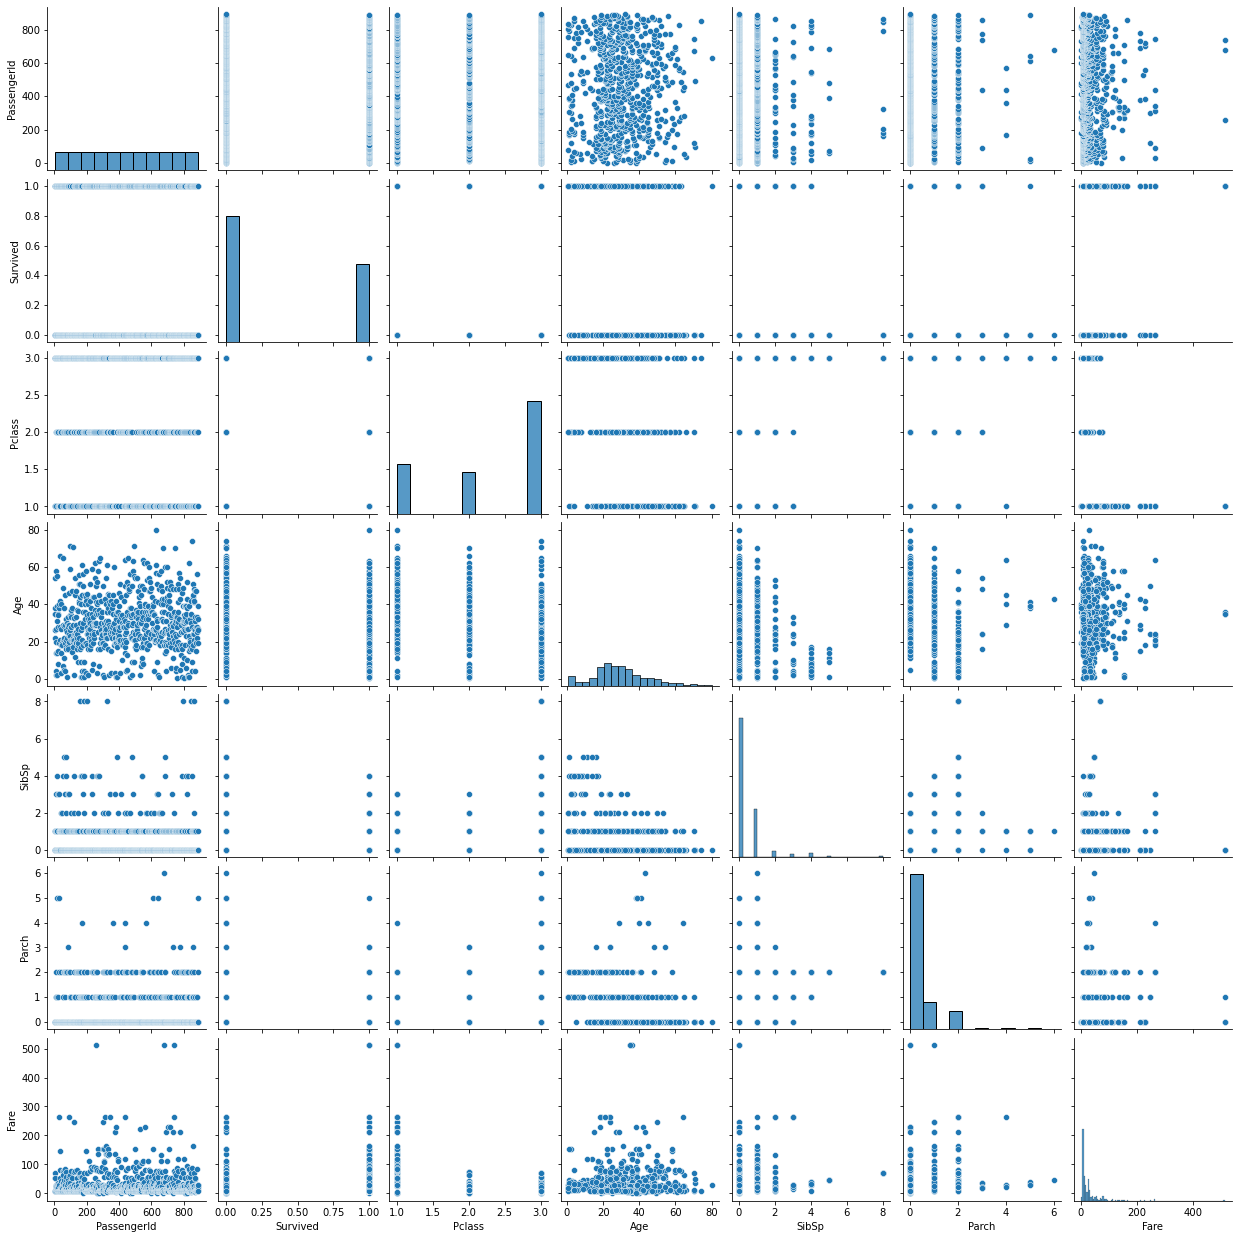

In [8]:
#Lets analyze hwo the distribution is statistically through pair plots and several plots

sns.pairplot(data= train_df)

In [9]:
train_df.shape


(891, 12)

In [10]:
test_df.shape

(418, 11)

In [11]:
#Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 3. Data Cleaning

Nice! We have a dataset with 891 rows and 12 columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.

In [13]:
#Lets create a copy of files to perform a data cleaning
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [14]:
#Check the missing values in train data
train_df_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Check the missing values in test data
test_df_copy.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### We Have very high number of missing values in cabin and followed by Age and just 2 in Embark column. Lets impute missing values in Age column by median and Embarked column by mode.

In [16]:
#Impute missing values in Age column with median
train_df_copy['Age'] = train_df_copy['Age'].fillna(train_df_copy['Age'].median())
test_df_copy['Age'] = test_df_copy['Age'].fillna(test_df_copy['Age'].median())

#Impute missing values in Embark with mode
train_df_copy['Embarked'] = train_df_copy['Embarked'].fillna(train_df_copy['Embarked'].mode()[0])
test_df_copy['Embarked'] = test_df_copy['Embarked'].fillna(test_df_copy['Embarked'].mode()[0])

In [17]:
test_df_copy['Embarked'].mode()[0]

'S'

In [18]:
test_df_copy['Age'].median()

27.0

In [19]:
train_df_copy['Age'].median()

28.0

Here empty value in Cabin column may indicate that pasenger didn't have a cabin. So we can explore further, If empty values have relation with column Survived

In [20]:
# Check if there is any relationship between Cabin and Survived columns

train_df_copy[train_df_copy['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [21]:
train_df_copy[train_df_copy['Cabin'].isna()]['Survived'].sum()

206

We can clearly that passenger with empty values in Cabin column have a less survival. So we can impute values in Cabin column with Missing.

In [22]:
# Impute missing values in Cabin column with 'Missing'
train_df_copy['Cabin'] = train_df_copy['Cabin'].fillna('Missing')
test_df_copy['Cabin'] = test_df_copy['Cabin'].fillna('Missing')

In [23]:
# Let see if we still have any missing values in the train data
train_df_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
train_df_copy['Cabin'].unique()


array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [25]:
test_df_copy['Embarked'].mode()[0]

'S'

In [26]:
#Check the missing values in test data
test_df_copy.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [27]:
#impute missing values in Fare column with median in test data
test_df_copy['Fare'] = test_df_copy['Fare'].fillna(test_df_copy['Fare'].median())

# Lets see we still have a missing values in test dataset
test_df_copy.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
# Check for duplicates in train data
train_df_copy.duplicated().sum()

0

In [29]:
# Check for duplicates in test data
test_df_copy.duplicated().sum()

0

No Duplicates in the dataset! Let's move on to the next step.

Let's covert Survived, Pclass, Sex, SibSp, Parch and Embarked to categorical variables.

In [30]:
# Convert Name, Survived, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in train data
train_df_copy['Survived'] = train_df_copy['Survived'].astype('category')
train_df_copy['Pclass'] = train_df_copy['Pclass'].astype('category')
train_df_copy['Sex'] = train_df_copy['Sex'].astype('category')
train_df_copy['SibSp'] = train_df_copy['SibSp'].astype('category')
train_df_copy['Parch'] = train_df_copy['Parch'].astype('category')
train_df_copy['Embarked'] = train_df_copy['Embarked'].astype('category')
train_df_copy['Ticket'] = train_df_copy['Ticket'].astype('category')
train_df_copy['Cabin'] = train_df_copy['Cabin'].astype('category')
train_df_copy['Name'] = train_df_copy['Name'].astype('category')

In [31]:
# Convert Name, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in test data
test_df_copy['Pclass'] = test_df_copy['Pclass'].astype('category')
test_df_copy['Sex'] = test_df_copy['Sex'].astype('category')
test_df_copy['SibSp'] = test_df_copy['SibSp'].astype('category')
test_df_copy['Parch'] = test_df_copy['Parch'].astype('category')
test_df_copy['Embarked'] = test_df_copy['Embarked'].astype('category')
test_df_copy['Ticket'] = test_df_copy['Ticket'].astype('category')
test_df_copy['Cabin'] = test_df_copy['Cabin'].astype('category')
test_df_copy['Name'] = test_df_copy['Name'].astype('category')

## 4. Exploratory data analysis
Let's perform exploratory data analysis to extract insights from the cab trips dataset:

### i. Univariate analysis
We will start by exploring the distribution of the nnumerical and categorical variable in the dataset:

In [32]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    
    #calculating points of standard daviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df , x=col, bins=30, kde=True, color= 'dodgerblue')
    sns.lineplot(x=points, y=(0,0), color = 'black', label= "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    #Creating a Dataframe for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                  'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))

In [33]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

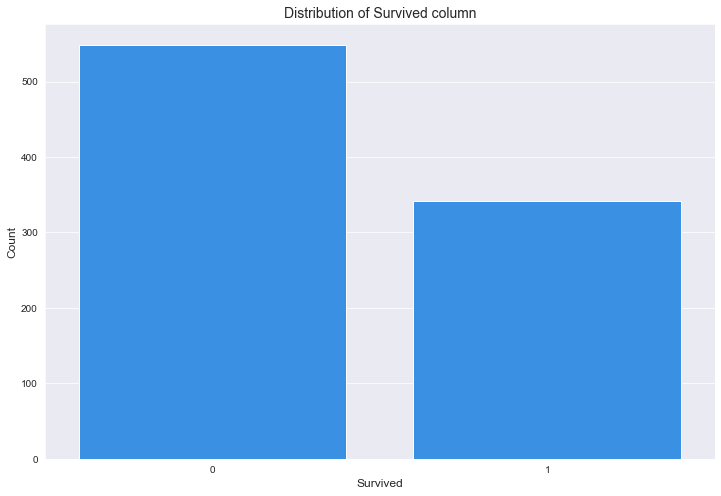

In [34]:
# Plot distribution of Survived column
plot_cat(train_df_copy, 'Survived', 'Survived', 'Count', 'Distribution of Survived column')

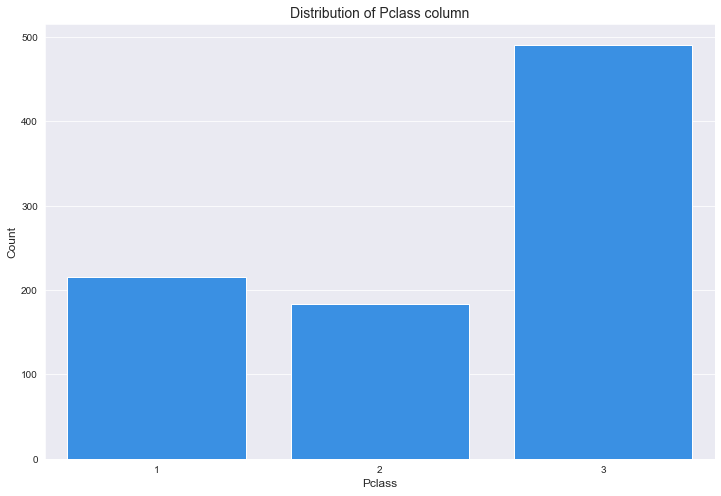

In [35]:
# Plotting distribution of Pclass column
plot_cat(train_df_copy, 'Pclass', 'Pclass', 'Count', 'Distribution of Pclass column')

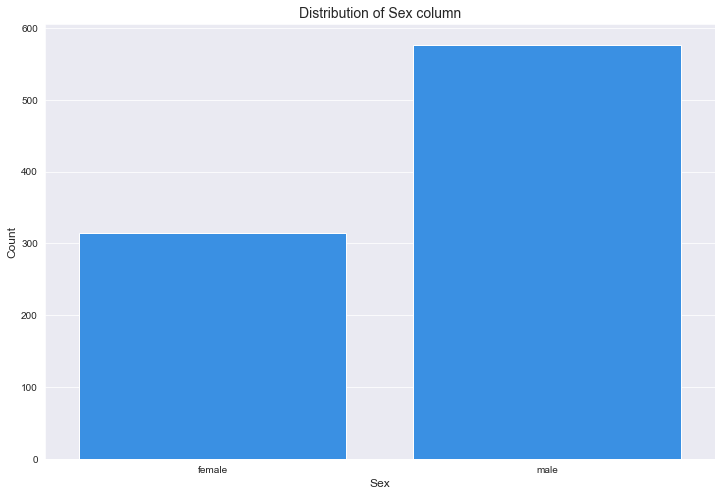

In [36]:
# Plotting distribution of Sex column
plot_cat(train_df_copy, 'Sex', 'Sex', 'Count', 'Distribution of Sex column')

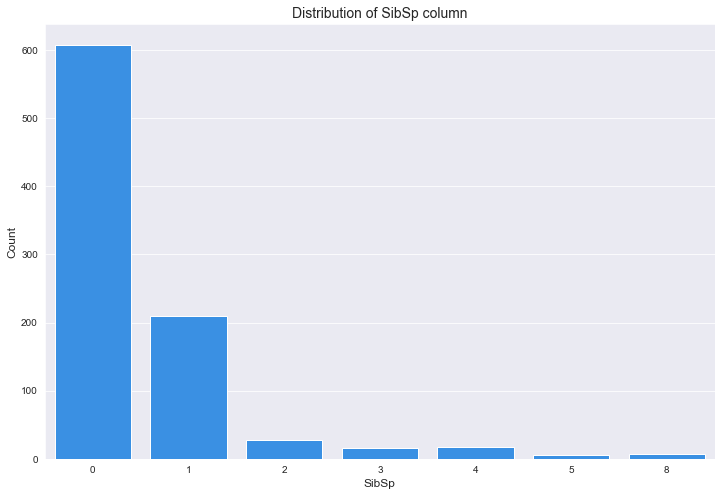

In [37]:
# Plottting distribution of SibSp column
plot_cat(train_df_copy, 'SibSp', 'SibSp', 'Count', 'Distribution of SibSp column')

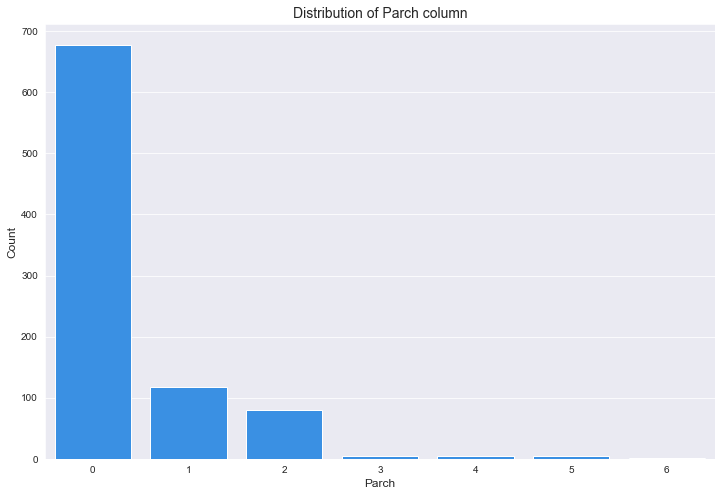

In [38]:
# Plottting distribution of Parch column
plot_cat(train_df_copy, 'Parch', 'Parch', 'Count', 'Distribution of Parch column')

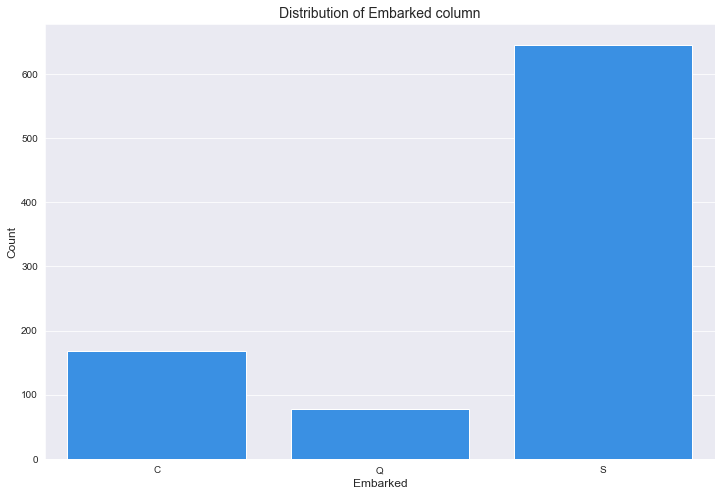

In [39]:
# Plottting distribution of Embarked column
plot_cat(train_df_copy, 'Embarked', 'Embarked', 'Count', 'Distribution of Embarked column')

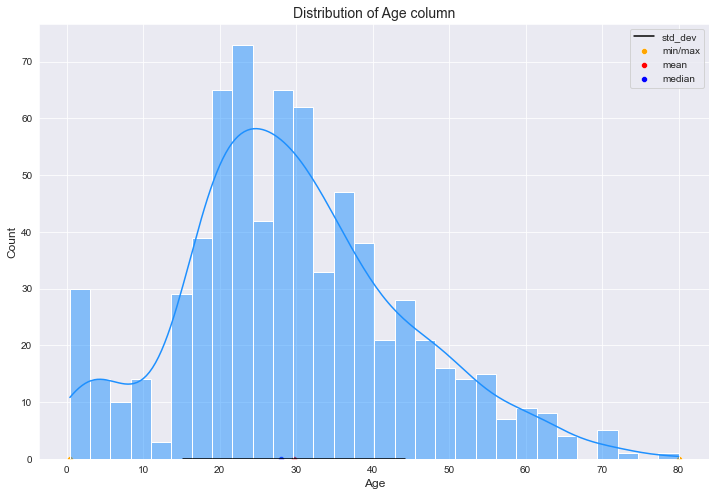

Statistics,Value
Minimum Value,0.42
Maximum Value,80
Range,79.58
Mean,29.6991
Median,28
Standard Deviation,14.5265
Skewness,0.389108
Kurtosis,0.178274


In [40]:
 #Plotting distribution of Age column
plot_dist(train_df, 'Age', 'Age', 'Count', 'Distribution of Age column')

<iframe src="https://www.kaggle.com/embed/rishabhvijay/surviving-the-titanic?cellIds=44&kernelSessionId=127807709" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Surviving the Titanic"></iframe>

- Median Age is 28.
- Mean and Median Age are almost same. So Age is normally distributed.

<p>We can clearly see that passengers with empty values in <b>Cabin</b> column have less chance of survival. So we can impute empty values in <b>Cabin</b> column with <b>Missing</b>.</p>

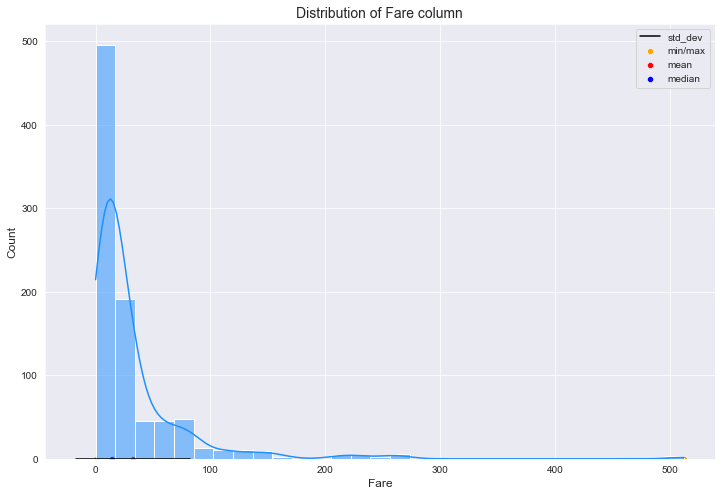

Statistics,Value
Minimum Value,0
Maximum Value,512.329
Range,512.329
Mean,32.2042
Median,14.4542
Standard Deviation,49.6934
Skewness,4.78732
Kurtosis,33.3981


In [41]:
# Let's see how Fare column is distributed
plot_dist(train_df, 'Fare', 'Fare', 'Count', 'Distribution of Fare column')

Kurtosis of Fare is very high. So Fare is highly skewed.

Which is as expected, because certain classes will have higher fares than others and limited seats.

ii. Bivariate analysis
Let's explore the relationship between the trip duration and other variables in the dataset:

In [42]:
# Function for planning the distibution of numeric variables against the target variable
# Here target variable os assumed to be categorical
def plot_num_vs_taget(df,col, target, x_label, y_label ,plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

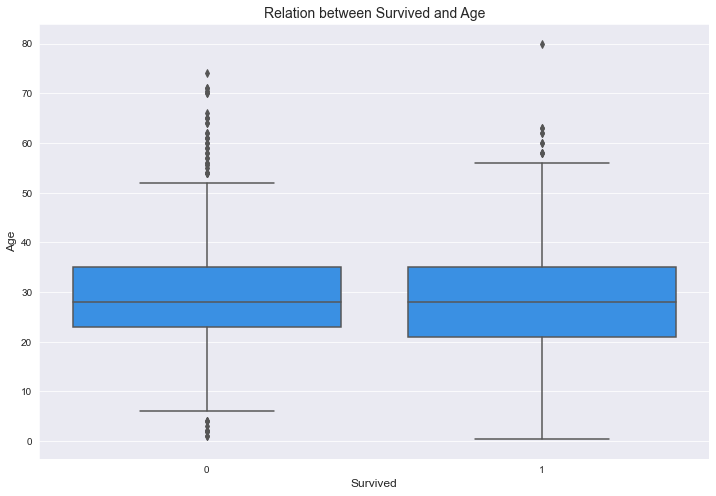

In [43]:
# Relation between survived and Age
plot_num_vs_taget(train_df_copy, 'Age',"Survived",'Survived',"Age",'Relation between Survived and Age')

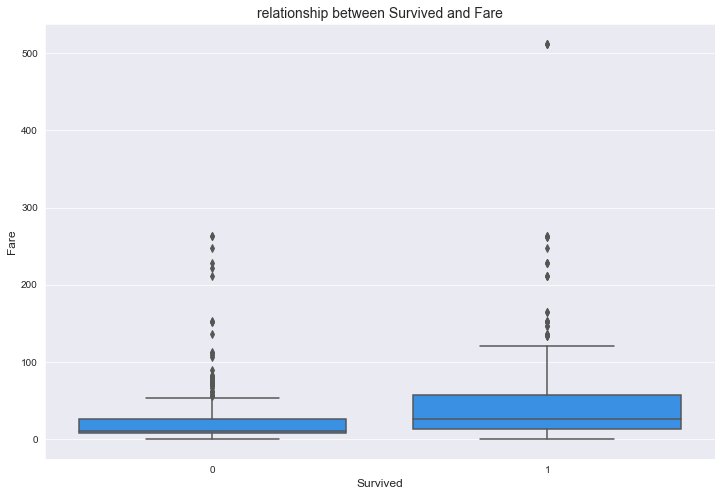

In [44]:
# Relationship between Survived and Fare
plot_num_vs_taget(train_df_copy, 'Fare',"Survived",'Survived','Fare', "relationship between Survived and Fare")

In [45]:
# Function for p[lotting the distribution of categorical variable against the target variable
# Here target variable and categorical variable are assumed to be categorical
def cat_plot_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data= df, x=col, hue=target, palette="Set1")
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

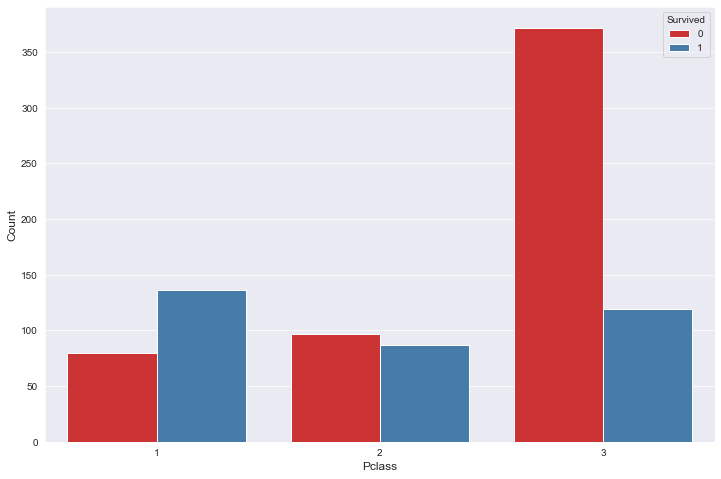

In [46]:
# Relationship between Survived and Pclass
cat_plot_vs_target(train_df_copy, 'Pclass', 'Survived', 'Pclass','Count', 'Relation Between Survived and Pclass')

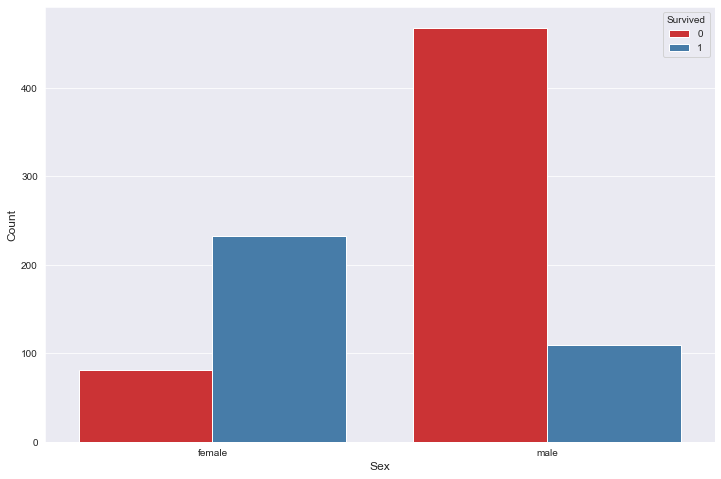

In [47]:
# Relation between survived and Sex
cat_plot_vs_target(train_df_copy, 'Sex', "Survived", 'Sex','Count',"Realtion between Sex and Survive")

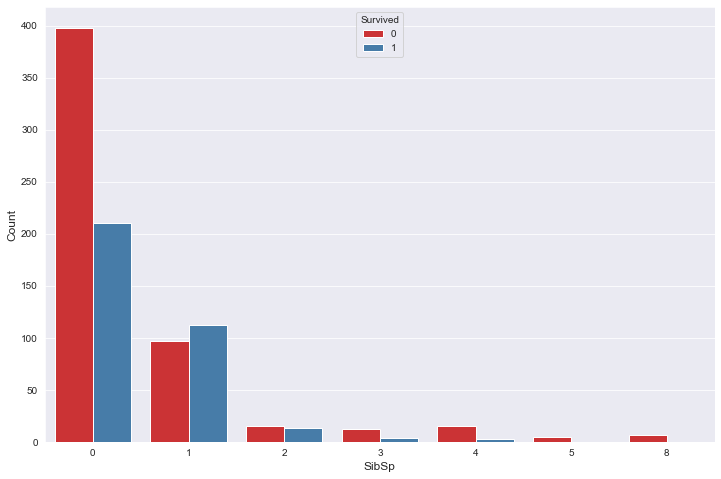

In [48]:
# Relation between Survived and SibSp
cat_plot_vs_target(train_df_copy, 'SibSp', "Survived",'SibSp', 'Count',"Relation betweeen Survived and SibSp")

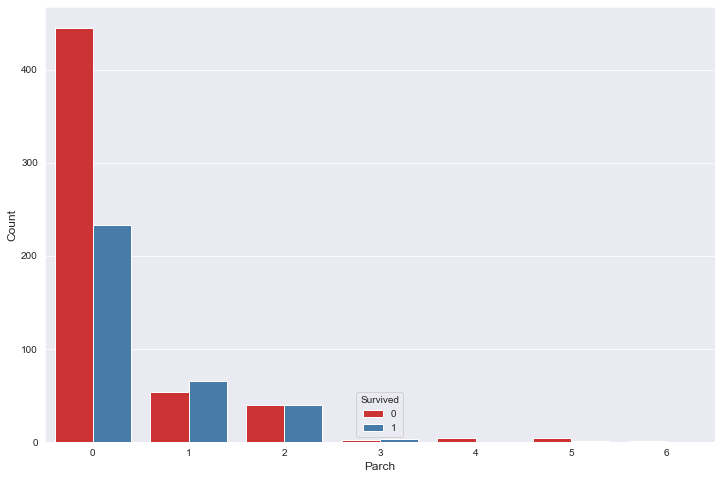

In [49]:
# Relation Between Survived and Parch
cat_plot_vs_target(train_df_copy,'Parch', 'Survived', 'Parch', 'Count', "Relation between Survived and Parch")

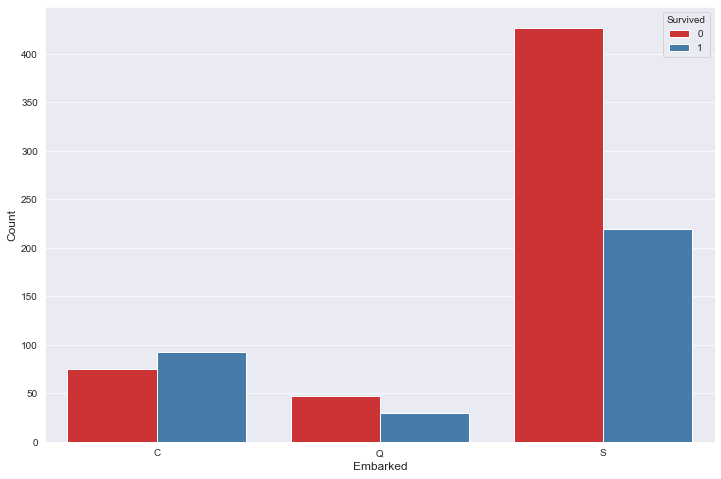

In [50]:
# Relation between Survived and Embark
cat_plot_vs_target( train_df_copy, 'Embarked', "Survived",'Embarked',"Count", "Relation between Embarked and Survived")

## 5. Data Preprocessing
Before we use variables in our model, we need to preprocess them. We will perform the following steps:

- One-hot encode categorical variables
- Lable encode categorical variables

In [51]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding

from sklearn.preprocessing import LabelEncoder
def encode_cat(df,col,encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col]= label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [52]:
# Encoding variables in the training dataset and create a new dataframe called df_train_encoded
train_df_encoded = train_df_copy.copy()
train_df_encoded = encode_cat(train_df_encoded, 'Survived', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'Cabin', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'Pclass', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'Sex', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'SibSp', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'Parch', 'label')
train_df_encoded = encode_cat(train_df_encoded, 'Embarked', 'label')

# Encoding variables in the test dataset and create a new dataframe called df_test_encoded
test_df_encoded = test_df_copy.copy()
test_df_encoded = encode_cat(test_df_encoded, 'Cabin', 'label')
test_df_encoded = encode_cat(test_df_encoded, 'Pclass', 'label')
test_df_encoded = encode_cat(test_df_encoded, 'Sex', 'label')
test_df_encoded = encode_cat(test_df_encoded, 'SibSp', 'label')
test_df_encoded = encode_cat(test_df_encoded, 'Parch', 'label')
test_df_encoded = encode_cat(test_df_encoded, 'Embarked', 'label')

In [53]:
# Check the processed training set
train_df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2


In [54]:
# Check the processed test set
test_df_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
3,895,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


Now that we have preprocessed the variables, let's check the correlation between them:

In [55]:
# Function to plot correlation between variables
def plot_corr(df, size=10):
    corr = df.corr()
    #print(corr)
    fig, ax = plt.subplots(figsize=(size,size))
    sns.heatmap(corr, annot= True, linewidths = .5, ax=ax, cmap='crest')
    plt.show()

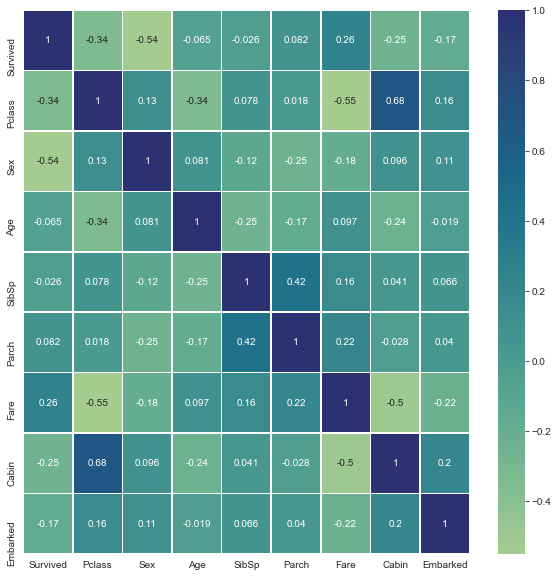

In [56]:
# Correlation between Variables in the training dataset
plot_corr(train_df_encoded.drop(['PassengerId','Name', 'Ticket'], axis=1))

Let's check the correlation between the variables and the target variable:

In [57]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

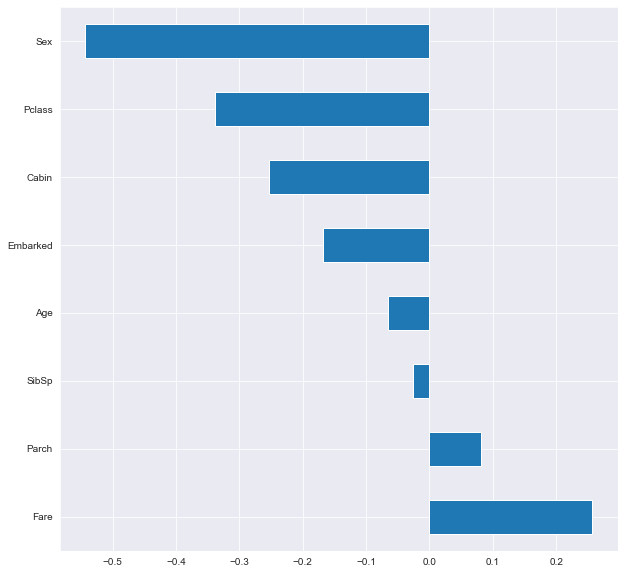

In [58]:
# Check correlation of variables with the target variable
plot_corr_target(train_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1), 'Survived')

## 6. Model Building
Let's build a model to predict the Survival of passengers on the Titanic:

In [59]:
# We will separate the target variable from the features
y = train_df_encoded['Survived']
x = train_df_encoded.drop(['Survived', 'Name','Ticket','PassengerId'],axis=1)
x.shape, y.shape

((891, 8), (891,))

Let's scale the features usinf scikit-learn's MinMax scaler:

In [60]:
# Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [61]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,22.0,1,0,7.2500,146,2
1,0,0,38.0,1,0,71.2833,81,0
2,2,0,26.0,0,0,7.9250,146,2
3,0,0,35.0,1,0,53.1000,55,2
4,2,1,35.0,0,0,8.0500,146,2
...,...,...,...,...,...,...,...,...
886,1,1,27.0,0,0,13.0000,146,2
887,0,0,19.0,0,0,30.0000,30,2
888,2,0,28.0,1,2,23.4500,146,2
889,0,1,26.0,0,0,30.0000,60,0


In [62]:
x = pd.DataFrame(x_scaled , columns = x.columns)

In [63]:
# Check data after scaling 
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.565736,0.490044,-0.473674,-0.502445,0.449441,0.585954
1,-1.566107,-1.355574,0.663861,0.490044,-0.473674,0.786845,-1.373473,-1.942303
2,0.827377,-1.355574,-0.258337,-0.504555,-0.473674,-0.488854,0.449441,0.585954
3,-1.566107,-1.355574,0.433312,0.490044,-0.473674,0.420730,-2.102639,0.585954
4,0.827377,0.737695,0.433312,-0.504555,-0.473674,-0.486337,0.449441,0.585954


Now, let's split the dataset into training and test sets:

In [64]:
# Importing the train test split fuction
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50 , stratify=y)

## 7. Model Generation and Evaluation
We will use different classification algorithms to build models and evaluate them using F1 score:

### i. KNN Classifier

In [65]:
# Import KNN classifier and metric F1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

Let's use KNN classifier to build a model and check consistency using cross validation:

In [66]:
from sklearn.model_selection import cross_val_score
# Fuction to cross validation for different values of k

def cross_val_knn(n_neighbors):
    """Takes in a value of k and returns the average and standard daviation of the F1 score for 10-fold cross validation"""
    average = []
    std = []
    for i in n_neighbors:
        knn = KNN(n_neighbors=i)
        scores = cross_val_score(knn, train_x, train_y, cv= 10, scoring= 'f1')
        average.append(scores.mean())
        std.append(scores.std())
    return average, std

In [67]:
# Let's check the scores for a range of k values
n_neighbors = range(1,50)
mean, std = cross_val_knn(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

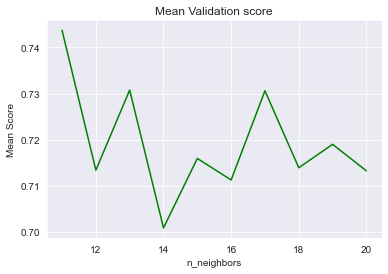

In [68]:
# Let's plot the average F1 score for each value of k
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean')
plt.xlabel('n_neighbors')
plt.ylabel("Mean Score")
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

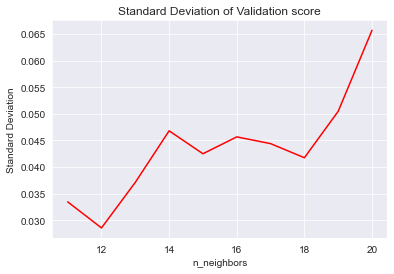

In [69]:
# Let's plot the standard deviation of the F1 score for each value of k
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'std' )
plt.xlabel('n_neighbors')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Validation score')

In [70]:
# Try fitting the model on the test set
knn = KNN(n_neighbors=12)
knn.fit(train_x, train_y)

# Predict on the train set
score1 = knn.score(train_x,train_y)

# Predict on the test set
score2 = knn.score(test_x, test_y)

print('Train score: ', score1)
print('Test score: ', score2)

Train score:  0.8353293413173652
Test score:  0.8116591928251121


In [71]:
test_df_encoded_dropped = test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
test_scaled = scaler.fit_transform(test_df_encoded_dropped)
test_df_scaled = pd.DataFrame(test_scaled, columns= test_df_encoded_dropped.columns)
submission_predictions = knn.predict(test_df_scaled)

#train_x.shape, test_x.shape, test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1).shape

In [78]:
train_x.shape, test_x.shape, test_df_encoded_dropped.shape

((668, 8), (223, 8), (418, 8))

In [73]:
test_df_encoded_dropped = test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [74]:
test_scaled = scaler.fit_transform(test_df_encoded_dropped)

In [75]:
test_df_scaled = pd.DataFrame(test_scaled, columns= test_df_encoded_dropped.columns)

In [76]:
submission_predictions = knn.predict(test_df_scaled)

In [79]:
submission_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [85]:
df_submission['Survived'] = submission_predictions

In [87]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [88]:
df_submission.to_csv('submission.csv', index=False)

### ii. Logistic Regression

In [89]:
# Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression


In [92]:
# Creaating inistance of logistic regression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(train_x, train_y)

# Predicting over the test set and claculating F1
test_predict_log = log_reg.predict(test_x)
k_log = f1_score(test_predict_log, test_y)

print("Test F1 Score : ", k_log)

Test F1 Score :  0.7108433734939759


In [93]:
submission_prediction_log = log_reg.predict(test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [94]:
submission_prediction_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
# Combine predicts with df_submission and save to csv
df_submission['Survived']=submission_prediction_log
df_submission.to_csv('submission_log.csv', index= False)

### iii. Decision Tree Classifier 

In [97]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
# Creating instance of Decision Tree Classifier 
clf = DecisionTreeClassifier()

In [100]:
#Fitting the model
clf.fit(train_x, train_y)

# Prediction over the Test set and claculating F1
test_predict_dt = clf.predict(test_x)
k_dt = f1_score(test_predict_dt, test_y)

print('Test F1 score : ', k_dt)

Test F1 score :  0.7317073170731708


In [101]:
submission_prediction_dt = clf.predict(test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [102]:
# Combine prediction with df_submission and save to csv
df_submission['Survived']= submission_prediction_dt
df_submission.to_csv('submission_dt.csv', index= False)

### iv. Random Forest Classifier

In [103]:
# Importing MLPC Classifier
from sklearn.neural_network import MLPClassifier

In [104]:
#Creating Instance for MLPC Classifier
clf = MLPClassifier()

#Fitting the model
clf.fit(train_x, train_y)

#Prediction over the Test set and calculating F1
test_predict_mlpc = clf.predict(test_x)
k_mlpc = f1_score(test_predict_mlpc, test_y)

print("Test F1 score: ", k_mlpc)

Test F1 score:  0.751592356687898


In [105]:
submission_prediction_mlpc = clf.predict(test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [106]:
# Combine prediction with df_submission and save to csv
df_submission['Survived']= submission_prediction_mlpc
df_submission.to_csv('submission_mlpc.csv', index= False)

### v. Support Vector Machine

In [107]:
#Import Suport vector classifier
from sklearn.svm import SVC

In [108]:
# Create instance of Support Vector Classifier
clf = SVC()

# Fitting the model
clf.fit(train_x, train_y)

# Predict over the Test set and calculate F1 score
test_predict_svc = clf.predict(test_x)
k_svc = f1_score(test_predict_svc, test_y)

print('Test f1 score: ', k_svc)

Test f1 score:  0.7388535031847132


In [109]:
submission_prediction_svc = clf.predict(test_df_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [110]:
# Combine the prediction with df_submission and save to csv file
df_submission['Survived'] = submission_prediction_svc
df_submission.to_csv('submission_svc.csv', index = False)